In [1]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

Using backend: tensorflow.compat.v1

2023-04-28 16:14:53.800528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


2023-04-28 16:23:34.652524: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-28 16:23:48.220133: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-28 16:23:48.220892: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Enable just-in-time compilation with XLA.




In [2]:
L = 1
m = 1
omega = 0.5

In [3]:
nx = 2
ny = 1

In [4]:
def psi(x, n):
    constants = (1.0 / (np.sqrt(np.math.factorial(n) * 2 ** n))) * (((m * omega) / np.pi) ** 0.25)
    exponent = np.exp(-0.5 * m * omega * np.power(x, 2))
    hermite_coefficients = [0] * n + [1]
    hermite = np.polynomial.hermite.Hermite(hermite_coefficients)
    hermite_value = hermite(x * np.sqrt(m * omega))
    result = constants * exponent * hermite_value
    return result.astype(dde.config.real(np))

In [5]:
def psi_2d_rectangle(x):
    x_component = psi(x[:, 0:1], nx)
    y_component = psi(x[:, 1:2], ny)
    return x_component * y_component

In [6]:
domain = dde.geometry.Rectangle([-L, -L], [L, L])

In [7]:
num_train = 16 ** 2
num_test = 100 ** 2
data = dde.data.Function(domain, psi_2d_rectangle, num_train, num_test)#, train_distribution='pseudo')

In [8]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([2] + [20] * 5 + [1], activation, initializer)

In [9]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])

Compiling model...
Building feed-forward neural network...


/home/piotr/repos/quant-chem-pinns/venv/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 3.935440 s



2023-04-28 16:31:38.576485: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-28 16:31:38.577394: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-28 16:31:38.578066: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

'compile' took 82.449517 s



In [10]:
loss_history, train_state = model.train(iterations=20000)

Initializing variables...


2023-04-28 16:32:57.396568: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Training model...



2023-04-28 16:33:27.862620: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f4a640055e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-28 16:33:27.862743: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce 940MX, Compute Capability 5.0
2023-04-28 16:33:42.884291: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-28 16:34:54.897152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-04-28 16:35:57.555739: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss    Test loss     Test metric   
0         [5.37e-02]    [4.85e-02]    [2.21e+00]    
1000      [1.54e-05]    [1.25e-05]    [3.55e-02]    
2000      [6.93e-06]    [5.84e-06]    [2.43e-02]    
3000      [2.55e-06]    [2.29e-06]    [1.52e-02]    
4000      [1.77e-06]    [1.84e-06]    [1.36e-02]    
5000      [4.06e-06]    [3.30e-06]    [1.82e-02]    
6000      [3.93e-07]    [3.75e-07]    [6.15e-03]    
7000      [4.94e-07]    [4.24e-07]    [6.53e-03]    
8000      [1.92e-06]    [1.82e-06]    [1.35e-02]    
9000      [9.20e-06]    [8.06e-06]    [2.85e-02]    
10000     [8.44e-07]    [8.38e-07]    [9.19e-03]    
11000     [2.42e-07]    [2.03e-07]    [4.52e-03]    
12000     [8.05e-07]    [8.14e-07]    [9.06e-03]    
13000     [2.07e-07]    [1.76e-07]    [4.21e-03]    
14000     [5.39e-06]    [5.39e-06]    [2.33e-02]    
15000     [9.78e-06]    [9.24e-06]    [3.05e-02]    
16000     [1.53e-07]    [1.47e-07]    [3.85e-03]    
17000     [1.28e-07]    [1.21e-07]    [3.49e-0

Saving loss history to /home/piotr/repos/quant-chem-pinns/harmonic-oscillator/2d/loss.dat ...
Saving training data to /home/piotr/repos/quant-chem-pinns/harmonic-oscillator/2d/train.dat ...
Saving test data to /home/piotr/repos/quant-chem-pinns/harmonic-oscillator/2d/test.dat ...


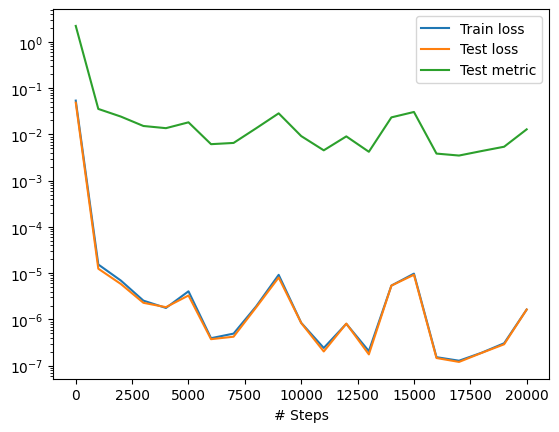

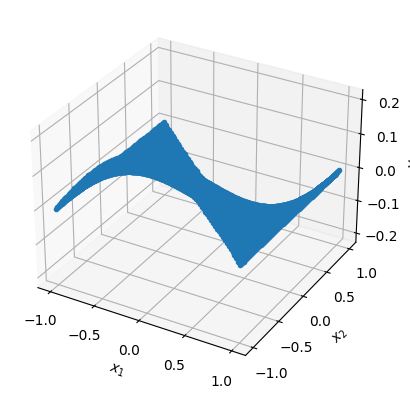

In [11]:
dde.saveplot(loss_history, train_state, issave=True, isplot=True)

In [19]:
def diff_function(x):
    model_value = model.predict(x)
    true_value = psi_2d_rectangle(x)
    return np.abs(model_value - true_value)

In [20]:
diff_function(np.array([[0.0, 0.0], [1.0, 0.0]]))

array([[0.00077558],
       [0.00136155]], dtype=float32)

In [27]:
x_ax = np.arange(-L, L, 0.1)
y_ax = np.arange(-L, L, 0.1)
grid_x, grid_y = np.meshgrid(x_ax, y_ax)

In [35]:
diff_list = []
for a, b in zip(grid_x, grid_y):
    pair_list = []
    for x, y in zip(a, b):
        pair_list.append([x, y])
    pairs = np.array(pair_list)
    diff_list.append(np.squeeze(diff_function(pairs)))

diff_list = np.array(diff_list)
print(diff_list.shape)

(20, 20)


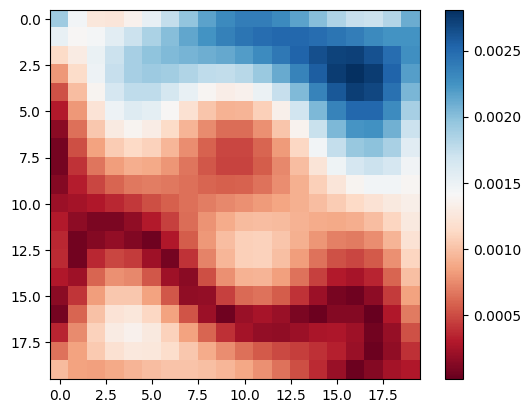

In [40]:
im = plt.imshow(diff_list, cmap=plt.cm.RdBu)
plt.colorbar(im)

plt.show()